## Práctica 4: Clasificador de Máquina de Soporte Vectorial

# 1. Cargar el Conjunto de Datos

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from skimage.feature import hog


In [2]:
from torchvision import datasets

In [12]:
from skimage.color import rgb2gray

In [5]:
#Cargar el conjunto de datos CIFAR-10
dataset = datasets.CIFAR10(root='./data', train=True, download=True)

100%|██████████| 170498071/170498071 [00:22<00:00, 7659419.14it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


# 2. Dividir el Conjunto de Datos

In [13]:
#Función para extraer características HOG de las imágenes en escala de grises
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Convertir la imagen a escala de grises
        gray_image = rgb2gray(image)
        # Calcular características HOG
        hog_image = hog(gray_image, orientations=8, pixels_per_cell=(8, 8),
                        cells_per_block=(1, 1), visualize=False)
        hog_features.append(hog_image)
    return np.array(hog_features)

In [14]:
#Obtener imágenes y etiquetas
X = [np.array(item[0]) for item in dataset]
y = [item[1] for item in dataset]

In [31]:
len(X)

50000

In [32]:
len(y)

50000

In [15]:
#Extraer características
X_hog = extract_hog_features(X)

In [17]:
#Dividir el test
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

In [34]:
len(X_train)

40000

In [35]:
len(X_test)

10000

# 3. Entrenar el Modelo SVM

In [18]:
#Entrenar el modelo
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

# 4. Evaluar el Modelo:

In [21]:
#Obtener metricas
def evaluar_modelo(modelo,X_test,y_test):
  y_pred=modelo.predict(X_test)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,average='weighted')
  recall=recall_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test,y_pred,average='weighted')

  metricas={
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall":recall,
      "F1 Score":f1
  }
  return metricas

In [22]:
metricas=evaluar_modelo(modelo,X_test,y_test)

In [23]:
metricas

{'Accuracy': 0.4258,
 'Precision': 0.42448483692694816,
 'Recall': 0.4258,
 'F1 Score': 0.4222544782755619}

# 5. Visualizar Imágenes Aleatorias

In [24]:
import random

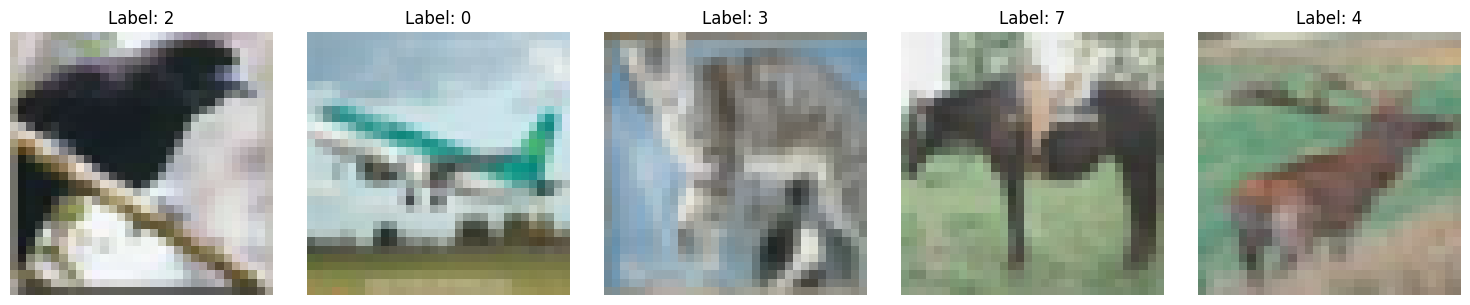

0: Avion
1: Automovil
2: Pajaro
3: Gato
4: Venado
5: Perro
6: Rana
7: Caballo
8: Barco
9: Camion


In [29]:
def visualize_random_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        index = random.randint(0, len(images) - 1)
        axes[i].imshow(images[index])
        axes[i].set_title(f"Label: {labels[index]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar imaggenes aleatoriamente
visualize_random_images(X, y)

print("0: Avion")
print("1: Automovil")
print("2: Pajaro")
print("3: Gato")
print("4: Venado")
print("5: Perro")
print("6: Rana")
print("7: Caballo")
print("8: Barco")
print("9: Camion")